In [59]:
from qiskit import *
from qiskit_aer import Aer
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

circuit = QuantumCircuit(2, 2)
services = QiskitRuntimeService()



# quantum _register = QuantumRegister(2)
# classical_register = ClassicalRegister(2)
# circuit = QuantumCircuit(quantum_register, classical_register)


In [60]:
%matplotlib inline

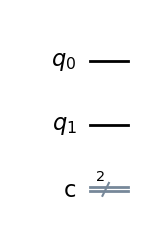

In [61]:

circuit.draw(output='mpl')

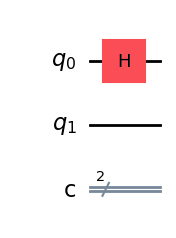

In [62]:
circuit.h(0)
circuit.draw(output='mpl')

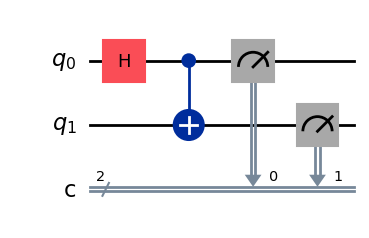

In [63]:
circuit.cx(0,1) # 0 -> control qubit, 1-> target qubit
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [64]:
simulator = Aer.get_backend('qasm_simulator')

In [65]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(circuit,simulator)

In [66]:
from qiskit.visualization import plot_histogram

In [67]:
# Execute the circuit on the simulator
result = simulator.run(compiled_circuit).result()

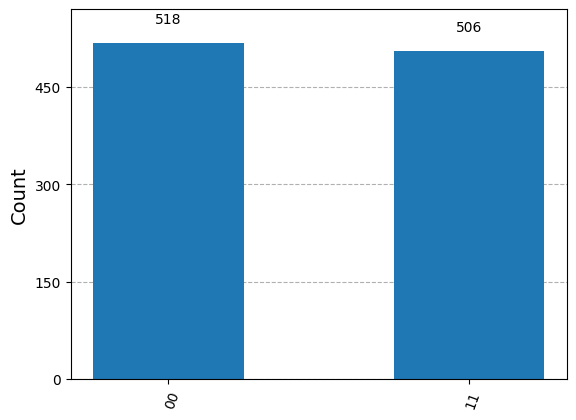

In [68]:
plot_histogram(result.get_counts(compiled_circuit))

In [69]:
# Mevcut backend'leri al ve kuantum bilgisayarı seç
backend = services.backend(name="ibm_sherbrooke")

In [70]:
# Devreyi kuantum bilgisayara uyumlu hale getir (transpile)
tqc = transpile(circuit, backend)

In [71]:
# Sampler kullanarak çalıştırma (örnekleme ve sonuç alma)
sampler = Sampler(backend=backend)
job = sampler.run([tqc])

/var/folders/5k/7c8zz58n4m17l84t20z154_r0000gn/T/ipykernel_17168/1626697788.py:2: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend)


In [ ]:
# Sonucu al ve yazdır
result = job.result()

print(f"Measurement results: {result}")

In [ ]:
plot_histogram(result.get_counts(circuit))